In [0]:
#pretext: this code uses and artificial neural network(reurrent model) to predict closing stock price of a well performing
#ie apple using LSTM .... Long Short term memory for it's reputation for efficiency in retaining data points based on importance and 
# ignores  superfluous data points

In [0]:
import math
import pandas_datareader as web #gets the stock quote as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [0]:
plt.style.use('fivethirtyeight')

In [0]:
# get Stock quote data using padas data reader
df = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-31')

In [62]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,51.115936
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.390648
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.961189
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.504375
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.421093
...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,284.269989
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300.0,289.910004
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500.0,289.799988


In [0]:
# jan 1 was sunday stocks were probably closed there are 
# four to five day cycles depending on weekends holidays and 
# maybe a sudden break in that cycle citing natural disasters
#  or political reasons that may be deemed merit to close stock market 

In [64]:
#get the number of columns and rows in the dataset
df.shape

(2012, 6)

In [65]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

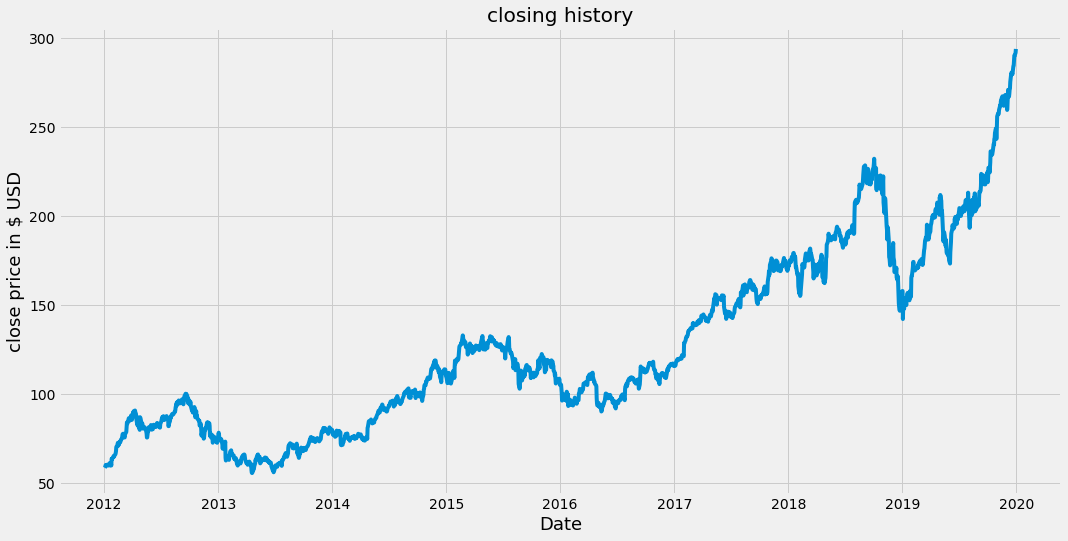

In [66]:
plt.figure(figsize=(16,8))
plt.title('closing history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price in $ USD',fontsize=18)
plt.show()

In [0]:
data = df.filter(['Close'])
#convert the dataframe to a numpy array ., but why reasons???
#creating dataframe data with only closing price data in it

In [68]:
data

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143
...,...
2019-12-24,284.269989
2019-12-26,289.910004
2019-12-27,289.799988


In [69]:
#convert dataframe to numpy array reasons ???
# to FEED LSTM with flexible dimensionality of arrays ie 2D or 3D convert tuples to np array
dataset = data.values
#train on 80 percent of rows
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len

1610

In [70]:
#scale the data Normalization for neural network accuracy
scaler = MinMaxScaler(feature_range=(0,1))
#create a dataset to hold the normalized values between 0 and 1
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.01243228],
       [0.0137596 ],
       [0.01651631],
       ...,
       [0.98381398],
       [0.99104513],
       [1.        ]])

In [71]:
#create the training dataset
#create the scaled data as a dataset

train_data = scaled_data[0:training_data_len, :]

#split data into x_train and y_train
x_train=[] #independent  variables
y_train=[] # dependent target variables

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0]) #0 to 59 indexed 60 vals
  y_train.append(train_data[i,0]) #61st val at index 60

  if i<=61:
    print(x_train)
    print()
    print(y_train)
    print()


[array([0.01243228, 0.0137596 , 0.01651631, 0.01914091, 0.01873851,
       0.0196454 , 0.01923099, 0.0185343 , 0.01758538, 0.02052227,
       0.02317089, 0.02235408, 0.01787967, 0.02214988, 0.01794572,
       0.0337113 , 0.03249209, 0.03408368, 0.03752507, 0.03960912,
       0.03943495, 0.03879233, 0.04153103, 0.04410756, 0.04702647,
       0.05174113, 0.06164491, 0.06179505, 0.06730851, 0.07142856,
       0.06434756, 0.06707427, 0.06702022, 0.07466578, 0.07357869,
       0.07559067, 0.07920624, 0.08121825, 0.08701398, 0.09123616,
       0.09245533, 0.09288177, 0.08566265, 0.0839209 , 0.08417917,
       0.09096586, 0.09287577, 0.0969778 , 0.10664737, 0.11954812,
       0.11713373, 0.11713972, 0.12646695, 0.12938582, 0.12730777,
       0.12540992, 0.12343396, 0.12999843, 0.1345029 , 0.13638876])]

[0.13172814323221588]

[array([0.01243228, 0.0137596 , 0.01651631, 0.01914091, 0.01873851,
       0.0196454 , 0.01923099, 0.0185343 , 0.01758538, 0.02052227,
       0.02317089, 0.02235408, 0.0

In [0]:
#convert xtain ytrain to np arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [73]:
#reshape xtrain data

x_train.shape

(1550, 60)

In [74]:
#converting 2d xtrain to 3d for feeding LSTM
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1550, 60, 1)

In [0]:
#build the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#run/compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [77]:
#train the model
model.fit(x_train,y_train, batch_size=1, epochs=1)

Epoch 1/1
1550/1550 [==============================] - 122s 79ms/step - loss: 6.2782e-04


In [0]:
#create the test dataset
#create a new array containing scaled values from 1550 to 2012
test_data = scaled_data[training_data_len -60: , :]
#creatextest and ytest
x_test = []
y_test = dataset[training_data_len: , :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
#convert data to numpy
x_test = np.array(x_test)

In [0]:
#Reshape data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [0]:
#get the models predicted price values
predictions = model.predict(x_test)

#unscaling the value from 0 to 1 to USD as original 
predictions = scaler.inverse_transform(predictions)

In [84]:
# Root mean squared error(RMSE)
#model evaluation metric
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

4.744036812094314

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


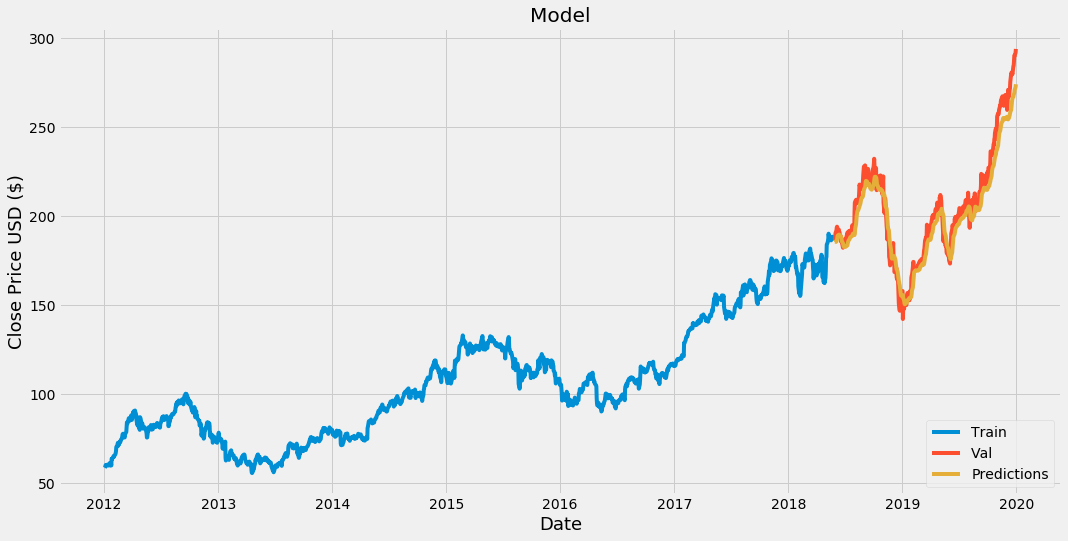

In [86]:
#plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions
#visualise
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [87]:
#show the valid prices
valid

,Close,Predictions
Date,,
2018-05-29,187.899994,185.361816
2018-05-30,187.500000,185.470032
2018-05-31,186.869995,185.475296
2018-06-01,190.240005,185.350769
2018-06-04,191.830002,185.630402
...,...,...
2019-12-24,284.269989,267.945221
2019-12-26,289.910004,269.000885
2019-12-27,289.799988,270.645691
